In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.regularizers import l2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Defining the path for train and test images

data = pathlib.Path("/content/drive/MyDrive/main_project/ECG")


In [ ]:
image_count_train = len(list(data.glob('*/*.jpg')))
print(image_count_train)


928


In [ ]:
batch_size = 32
img_height = 224
img_width = 224

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = image_dataset_from_directory(data, 
                                        seed = 123, 
                                        image_size=(img_height, img_width), 
                                        validation_split=0.2, 
                                        subset='training')

Found 928 files belonging to 4 classes.
Using 743 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = image_dataset_from_directory(data, 
                                      seed = 123, 
                                      image_size=(img_height, img_width), 
                                      validation_split=0.2, 
                                      subset='validation')

Found 928 files belonging to 4 classes.
Using 185 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(type(class_names), class_names)

<class 'list'> ['1MI', '2HB', '3PMI', '4Normal']


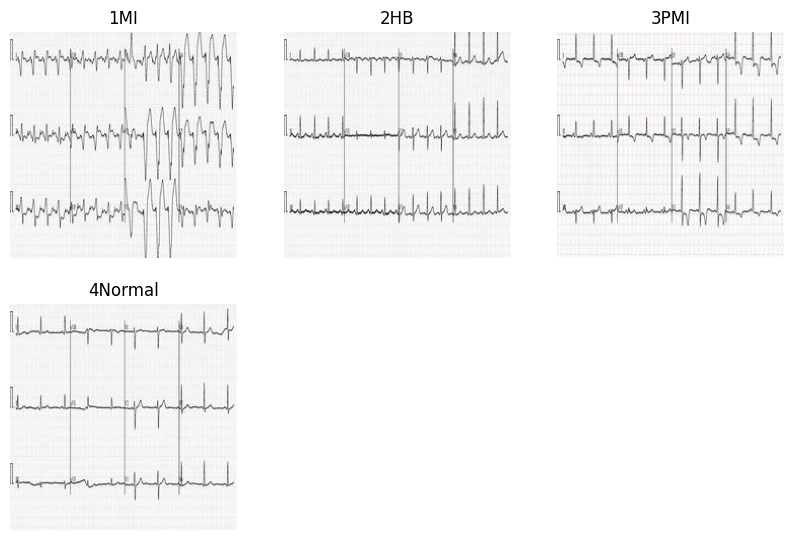

In [ ]:
### Visualizing the training data

plt.figure(figsize=(10, 10))

for i, class_ in enumerate(list(class_names)):
    plt.subplot(3, 3, i+1)
    data_path = os.path.join(str(data), class_)
    file_path = glob.glob(os.path.join(data_path,'*.jpg'))[0]
    img = PIL.Image.open(file_path)
    plt.imshow(img)
    plt.title(class_)
    plt.axis("off")
plt.show()

In [ ]:
import cv2

# Load an image using OpenCV
img = cv2.imread('/content/drive/MyDrive/main_project/ECG/1MI/MI(1).jpg')

# Get the shape of the image
img_shape = img.shape

# Print the shape of the image
print('/content/drive/MyDrive/main_project/ECG/1MI/MI(1).jpg', img_shape)


/content/drive/MyDrive/main_project/ECG/1MI/MI(1).jpg (224, 224, 3)


In [ ]:
for image_batch, labels_batch in train_ds.take(1):
    print(image_batch.shape)
    print(labels_batch.shape)

(32, 224, 224, 3)
(32,)


In [ ]:
data_augmentation = tf.keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

1/1 [==============================] - 0s 53ms/step


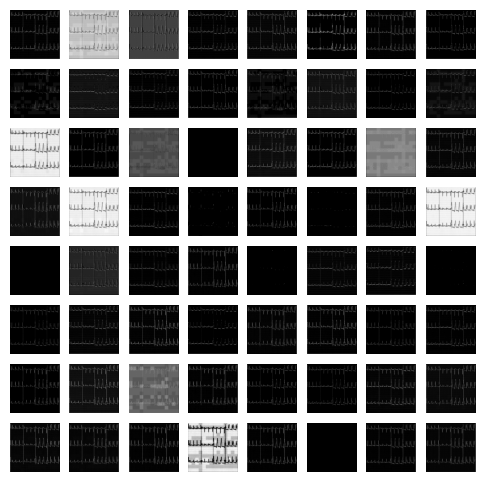

In [ ]:
import keras
from keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
# Load an example image
img_path = '/content/drive/MyDrive/main_project/ECG/1MI/MI(104).jpg'
img = load_img(img_path, target_size=(224, 224)) # adjust target size to match model input size
x = img_to_array(img)
x = preprocess_input(x)
# Load a pre-trained VGG16 model (or any other CNN model)
model = keras.applications.VGG16(weights='imagenet', include_top=True)
# Define a new model that outputs the feature maps of a specific layer
layer_name = 'block1_conv1' # choose any layer in the model
feature_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
# Generate the feature maps for the input image
features = feature_model.predict(np.array([x]))
# Plot the feature maps
n_filters = features.shape[-1]
fig, axes = plt.subplots(n_filters // 8, 8, figsize=(6, 6))
for i in range(n_filters):
    ax = axes[i // 8, i % 8]
    ax.imshow(features[0, :, :, i], cmap='gray')
    ax.axis('off')
plt.show()

1/1 [==============================] - 0s 61ms/step


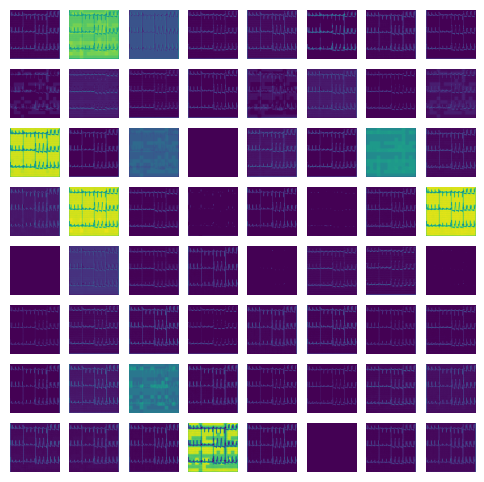

In [ ]:
import keras
from keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt

# Load an example image
img_path = '/content/drive/MyDrive/main_project/ECG/1MI/MI(104).jpg'
img = load_img(img_path, target_size=(224, 224)) # adjust target size to match model input size
x = img_to_array(img)
x = preprocess_input(x)

# Load a pre-trained VGG16 model (or any other CNN model)
model = keras.applications.VGG16(weights='imagenet', include_top=True)

# Define a new model that outputs the activations of a specific layer
layer_name = 'block1_conv1' # choose any layer in the model
activations_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

# Generate the activations for the input image
activations = activations_model.predict(np.array([x]))

# Plot the activations
n_activations = activations.shape[-1]
fig, axes = plt.subplots(n_activations // 8, 8, figsize=(6, 6))
for i in range(n_activations):
    ax = axes[i // 8, i % 8]
    ax.imshow(activations[0, :, :, i], cmap='viridis')
    ax.axis('off')
plt.show()


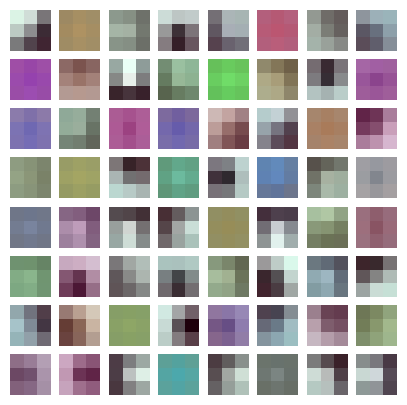

In [ ]:
import keras
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

# Load a pre-trained VGG16 model (or any other CNN model)
model = keras.applications.VGG16(weights='imagenet', include_top=False)

# Get the weights of the first convolutional layer
filters, biases = model.layers[1].get_weights()

# Normalize the filters to make them visually interpretable
filters = (filters - np.min(filters)) / (np.max(filters) - np.min(filters))
n_filters = filters.shape[-1]

# Plot the filters
fig, axes = plt.subplots(n_filters // 8, 8, figsize=(5, 5))
for i in range(n_filters):
    ax = axes[i // 8, i % 8]
    ax.imshow(filters[:, :, :, i], cmap='gray')
    ax.axis('off')
plt.show()


In [ ]:
num_classes = 4


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(Conv2D(32,(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(layers.MaxPooling2D((2, 2))) 

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(layers.MaxPooling2D((2, 2))) 

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))



model.add(Flatten())
model.add(Dense(256))
model.add(Activation('softmax'))
model.add(Dense(num_classes))

In [ ]:
## Your code goes here
model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 activation_18 (Activation)  (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 111, 111, 32)      9248      
                                                                 
 activation_19 (Activation)  (None, 111, 111, 32)      0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 55, 55, 32)       0         
 g2D)                                                 

In [ ]:
#model.add(Conv2D(32,(3, 3), padding='same'))
#model.add(Activation('relu'))
#model.add(layers.MaxPooling2D((2, 2)))

In [ ]:
epochs = 25

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25
27/27 [==============================] - 54s 2s/step - loss: 1.3748 - accuracy: 0.3086 - val_loss: 1.3835 - val_accuracy: 0.2541
Epoch 2/25
27/27 [==============================] - 55s 2s/step - loss: 1.3740 - accuracy: 0.3086 - val_loss: 1.3834 - val_accuracy: 0.2541
Epoch 3/25
27/27 [==============================] - 54s 2s/step - loss: 1.3735 - accuracy: 0.3086 - val_loss: 1.3839 - val_accuracy: 0.2541
Epoch 4/25
27/27 [==============================] - 55s 2s/step - loss: 1.3731 - accuracy: 0.3086 - val_loss: 1.3840 - val_accuracy: 0.2541
Epoch 5/25
27/27 [==============================] - 54s 2s/step - loss: 1.3726 - accuracy: 0.3086 - val_loss: 1.3840 - val_accuracy: 0.2541
Epoch 6/25
27/27 [==============================] - 54s 2s/step - loss: 1.3725 - accuracy: 0.3086 - val_loss: 1.3845 - val_accuracy: 0.2541
Epoch 7/25
27/27 [==============================] - 54s 2s/step - loss: 1.3722 - accuracy: 0.3086 - val_loss: 1.3842 - val_accuracy: 0.2541
Epoch 8/25
27/27 [==

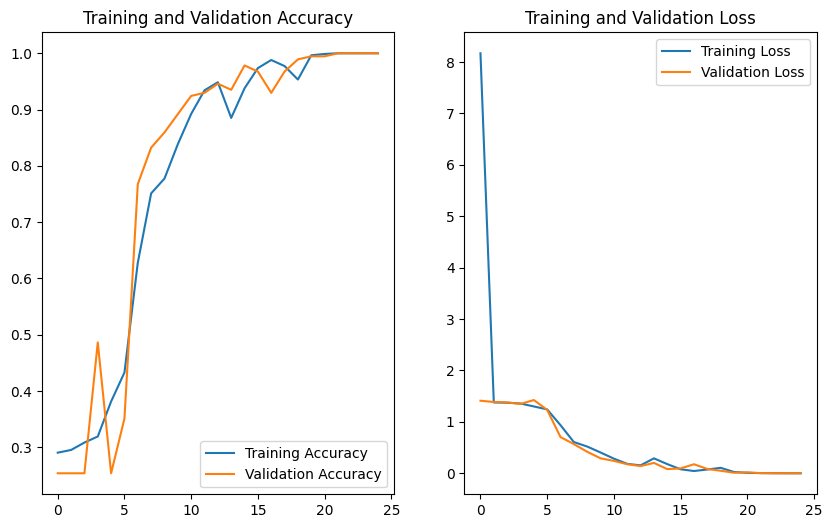

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.save('keras_model.h5')
# Save the model to Google Drive
model.save('/content/drive/MyDrive/main_project/ECG_Model_saved')


In [ ]:
import os
from keras.models import load_model
from PIL import Image
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("/content/drive/MyDrive/main_project/keras_model.h5", compile=False)

# Load the labels
class_names = open("/content/drive/MyDrive/main_project/labels.txt", "r").readlines()

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
path=["/content/drive/MyDrive/main_project/Sample images/MI(59).jpg","/content/drive/MyDrive/main_project/Sample images/HB(127).jpg","/content/drive/MyDrive/main_project/Sample images/PMI(162).jpg","/content/drive/MyDrive/main_project/Sample images/Normal(87).jpg","/content/drive/MyDrive/main_project/Sample images/sample2.jpg"]
path=["/content/drive/MyDrive/main_project/png2jpg.zip (Unzipped Files)/mi3.jpg","/content/drive/MyDrive/main_project/ECG/2HB/HB(101).jpg","/content/drive/MyDrive/main_project/ECG/3PMI/PMI(100).jpg","/content/drive/MyDrive/main_project/ECG/4Normal/Normal(100).jpg","/content/drive/MyDrive/main_project/png2jpg.zip (Unzipped Files)/abnormalecg3.jpg","/content/drive/MyDrive/main_project/png2jpg.zip (Unzipped Files)/pmi2.jpg","/content/drive/MyDrive/main_project/png2jpg.zip (Unzipped Files)/abnormalecg2.jpg","/content/drive/MyDrive/main_project/png2jpg.zip (Unzipped Files)/mi1.jpg","/content/drive/MyDrive/main_project/png2jpg.zip (Unzipped Files)/mi2.jpg","/content/drive/MyDrive/main_project/png2jpg.zip (Unzipped Files)/normalecg1.jpg","/content/drive/MyDrive/main_project/png2jpg.zip (Unzipped Files)/save images.jpg","/content/drive/MyDrive/main_project/png2jpg.zip (Unzipped Files)/1.jpg"]
#path=["/content/drive/MyDrive/main_project/Sample images/resized_223.jpg","/content/drive/MyDrive/main_project/Sample images/resized_224.jpg","/content/drive/MyDrive/main_project/Sample images/resized_225.jpg","/content/drive/MyDrive/main_project/Sample images/resized_226.jpg"]

for i in path:
    # Load the image and preprocess 
    img_path = i
    img = Image.open(img_path).convert("RGB")
    img = img.resize((224, 224), Image.BICUBIC)
    image_array = np.asarray(img)
    normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

    # Load the image into the array
    data[0] = normalized_image_array

    # Predict the model
    prediction = model.predict(data)
    index = np.argmax(prediction)
    class_name = class_names[index]
    confidence_score = prediction[0][index]

    # Print prediction and confidence score
    if index == 0:
        print("Prediction: mi with confidence", confidence_score)
    elif index == 1:
        print("Prediction: ab with confidence", confidence_score)
    elif index == 2:
        print("Prediction: ph with confidence", confidence_score)
    else:
        print("Prediction: norm with confidence", confidence_score)

1/1 [==============================] - 1s 893ms/step
Prediction: mi with confidence 0.99997926
1/1 [==============================] - 0s 71ms/step
Prediction: ab with confidence 0.9977551
1/1 [==============================] - 0s 43ms/step
Prediction: ph with confidence 0.97046196
1/1 [==============================] - 0s 44ms/step
Prediction: norm with confidence 0.84177136
1/1 [==============================] - 0s 43ms/step
Prediction: mi with confidence 0.8116746
1/1 [==============================] - 0s 50ms/step
Prediction: mi with confidence 0.86897206
1/1 [==============================] - 0s 33ms/step
Prediction: mi with confidence 0.9959967
1/1 [==============================] - 0s 36ms/step
Prediction: ab with confidence 0.8965742
1/1 [==============================] - 0s 35ms/step
Prediction: ab with confidence 0.96336085
1/1 [==============================] - 0s 31ms/step
Prediction: mi with confidence 0.9455104
1/1 [==============================] - 0s 33ms/step
Prediction

In [ ]:
import os
from keras.models import load_model
from PIL import Image
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("/content/drive/MyDrive/main_project/keras_model (1).h5", compile=False)

# Load the labels
class_names = open("/content/drive/MyDrive/main_project/labels.txt", "r").readlines()

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
path=["/content/drive/MyDrive/main_project/Sample images/MI(59).jpg","/content/drive/MyDrive/main_project/Sample images/HB(127).jpg","/content/drive/MyDrive/main_project/Sample images/PMI(162).jpg","/content/drive/MyDrive/main_project/Sample images/Normal(87).jpg","/content/drive/MyDrive/main_project/Sample images/sample2.jpg"]
path=["/content/drive/MyDrive/main_project/png2jpg.zip (Unzipped Files)/mi3.jpg","/content/drive/MyDrive/main_project/ECG/2HB/HB(101).jpg","/content/drive/MyDrive/main_project/ECG/3PMI/PMI(100).jpg","/content/drive/MyDrive/main_project/ECG/4Normal/Normal(100).jpg","/content/drive/MyDrive/main_project/png2jpg.zip (Unzipped Files)/abnormalecg3.jpg","/content/drive/MyDrive/main_project/png2jpg.zip (Unzipped Files)/pmi2.jpg","/content/drive/MyDrive/main_project/png2jpg.zip (Unzipped Files)/abnormalecg2.jpg","/content/drive/MyDrive/main_project/png2jpg.zip (Unzipped Files)/mi1.jpg","/content/drive/MyDrive/main_project/png2jpg.zip (Unzipped Files)/mi2.jpg","/content/drive/MyDrive/main_project/png2jpg.zip (Unzipped Files)/normalecg1.jpg","/content/drive/MyDrive/main_project/png2jpg.zip (Unzipped Files)/save images.jpg","/content/drive/MyDrive/main_project/png2jpg.zip (Unzipped Files)/1.jpg"]
#path=["/content/drive/MyDrive/main_project/Sample images/resized_223.jpg","/content/drive/MyDrive/main_project/Sample images/resized_224.jpg","/content/drive/MyDrive/main_project/Sample images/resized_225.jpg","/content/drive/MyDrive/main_project/Sample images/resized_226.jpg"]

for i in path:
    # Load the image and preprocess 
    img_path = i
    img = Image.open(img_path).convert("RGB")
    img = img.resize((224, 224), Image.BICUBIC)
    image_array = np.asarray(img)
    normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

    # Load the image into the array
    data[0] = normalized_image_array

    # Predict the model
    prediction = model.predict(data)
    index = np.argmax(prediction)
    class_name = class_names[index]
    confidence_score = prediction[0][index]

    # Print prediction and confidence score
    if index == 0:
        print("Prediction: mi with confidence", confidence_score)
    elif index == 1:
        print("Prediction: ab with confidence", confidence_score)
    elif index == 2:
        print("Prediction: ph with confidence", confidence_score)
    else:
        print("Prediction: norm with confidence", confidence_score)

1/1 [==============================] - 1s 1s/step
Prediction: mi with confidence 0.99997926
1/1 [==============================] - 0s 63ms/step
Prediction: ab with confidence 0.9977551
1/1 [==============================] - 0s 62ms/step
Prediction: ph with confidence 0.9704624
1/1 [==============================] - 0s 76ms/step
Prediction: norm with confidence 0.8417682
1/1 [==============================] - 0s 66ms/step
Prediction: mi with confidence 0.81167215
1/1 [==============================] - 0s 46ms/step
Prediction: mi with confidence 0.86897117
1/1 [==============================] - 0s 41ms/step
Prediction: mi with confidence 0.99599695
1/1 [==============================] - 0s 40ms/step
Prediction: ab with confidence 0.89657325
1/1 [==============================] - 0s 40ms/step
Prediction: ab with confidence 0.9633606
1/1 [==============================] - 0s 40ms/step
Prediction: mi with confidence 0.94551027
1/1 [==============================] - 0s 39ms/step
Prediction: 

6/6 [==============================] - 3s 439ms/step


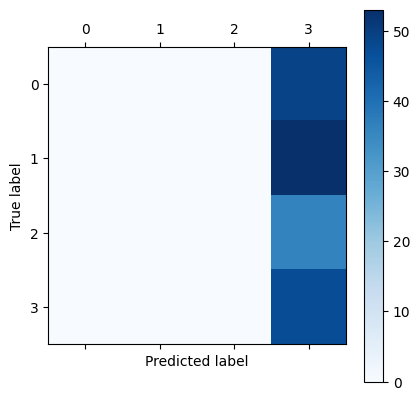

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
# Get the true labels from the validation dataset
true_labels = []
for images, labels in val_ds:
    true_labels.extend(labels.numpy())
class_names = train_ds.class_names

# Convert the true labels from numerical to string labels
class_names = val_ds.class_names
true_labels = np.array(class_names)[true_labels]

# Generate the predicted labels using the trained model
predicted_labels = np.argmax(model.predict(val_ds), axis=-1)
predicted_labels = np.array(class_names)[predicted_labels]

# Generate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=class_names)

# Plot the confusion matrix
plt.matshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Load the test dataset
test_ds = train_ds

# Make predictions on the test dataset
y_pred_prob = model.predict(test_ds)

# Convert predicted probabilities into class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Get true labels from the test dataset
y_true = np.concatenate([y for x, y in test_ds], axis=0)

# Create the classification report
report = classification_report(y_true, y_pred, target_names=class_names)

print(report)


27/27 [==============================] - 17s 592ms/step
              precision    recall  f1-score   support

         1MI       0.00      0.00      0.00       214
         2HB       0.00      0.00      0.00       209
        3PMI       0.00      0.00      0.00       155
     4Normal       0.31      1.00      0.47       258

    accuracy                           0.31       836
   macro avg       0.08      0.25      0.12       836
weighted avg       0.10      0.31      0.15       836



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Load the test dataset
test_ds = val_ds

# Make predictions on the test dataset
y_pred_prob = model.predict(test_ds)

# Convert predicted probabilities into class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Get true labels from the test dataset
y_true = np.concatenate([y for x, y in test_ds], axis=0)

# Create the classification report
report = classification_report(y_true, y_pred, target_names=class_names)

print(report)


6/6 [==============================] - 4s 698ms/step
              precision    recall  f1-score   support

         1MI       0.00      0.00      0.00        49
         2HB       0.00      0.00      0.00        53
        3PMI       0.00      0.00      0.00        36
     4Normal       0.25      1.00      0.41        47

    accuracy                           0.25       185
   macro avg       0.06      0.25      0.10       185
weighted avg       0.06      0.25      0.10       185



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


6/6 [==============================] - 3s 441ms/step
confusion matrix:
 [[ 0  0  0 49]
 [ 0  0  0 53]
 [ 0  0  0 36]
 [ 0  0  0 47]]


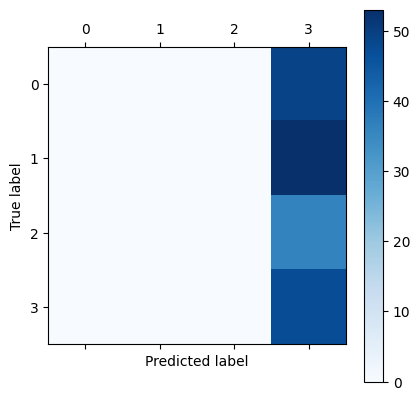

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get the true labels from the validation dataset
true_labels = []
for images, labels in val_ds:
    true_labels.extend(labels.numpy())
class_names = train_ds.class_names

# Convert the true labels from numerical to string labels
class_names = val_ds.class_names
true_labels = np.array(class_names)[true_labels]

# Generate the predicted labels using the trained model
predicted_labels = np.argmax(model.predict(val_ds), axis=-1)
predicted_labels = np.array(class_names)[predicted_labels]
def confusion_matrix(y_true, y_pred):
# Generate the confusion matrix
   cm = confusion_matrix(true_labels, predicted_labels, labels=["mi", "ab", "pmi", "norm"])
print("confusion matrix:\n", cm)
# Plot the confusion matrix
plt.matshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

confusion matrix:
 [[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]


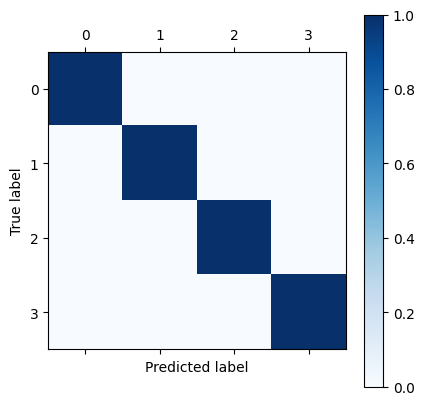

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=["mi", "ab", "pmi", "norm"])
print("confusion matrix:\n", cm)
# Plot the confusion matrix
plt.matshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()